In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

В задаче необходимо понять, кто из содрудников останется работать в компании. В данном датасете представлена информация о 15000 работниках. Нужно определить, останется ли человек работать на основании его характеристик, например уровень доверия, количество проектов, название отдела и другие.

# Загружаем данные

In [3]:
url = "https://raw.githubusercontent.com/KAD1029/ML_2021/main/employee.csv"
data = pd.read_csv(url)
#data = pd.read_csv('employee.csv')

Можем видеть, что в таблице находится 14999 строк и 10 столбцов

In [4]:
data.shape

(14999, 10)

In [5]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


Посмотрим, какие значения принимают признаки

In [6]:
for column in data.columns :
    print(column, '          ', data[column].unique())

satisfaction_level            [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
last_evaluation            [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
number_project            [2 5 7 6 4 3]
average_montly_hours            [157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282

# Обработка номинальных признаков

Было видно, что присутствуют численные категориальные признаки, номинальные признаки и категориальные строковые.
Обработаем строковые признаки двумя способами.
Один принимает одно из трех значений. Заменим их числами от 0 до 2.
Второй принимает одно из 10 значений. Заменим его десятью бинарными признаками.

In [7]:
department_dummies = pd.get_dummies(data['department'])

In [8]:
department_dummies

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [9]:
data = pd.concat((data, department_dummies), axis=1)
data = data.drop(['department'], axis=1)

data['salary'] = pd.factorize(data['salary'])[0]

In [10]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0


Увидим, что признаков стало больше и все они численные

In [11]:
for column in data.columns :
    print(column, '          ', data[column].unique())

satisfaction_level            [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
last_evaluation            [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
number_project            [2 5 7 6 4 3]
average_montly_hours            [157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282

# Выбросы

Проверим данные на наличие выбросов.
Построим диаграммы рассеивания. Из них видно, что значения сгруппированы и выбросов не видно.

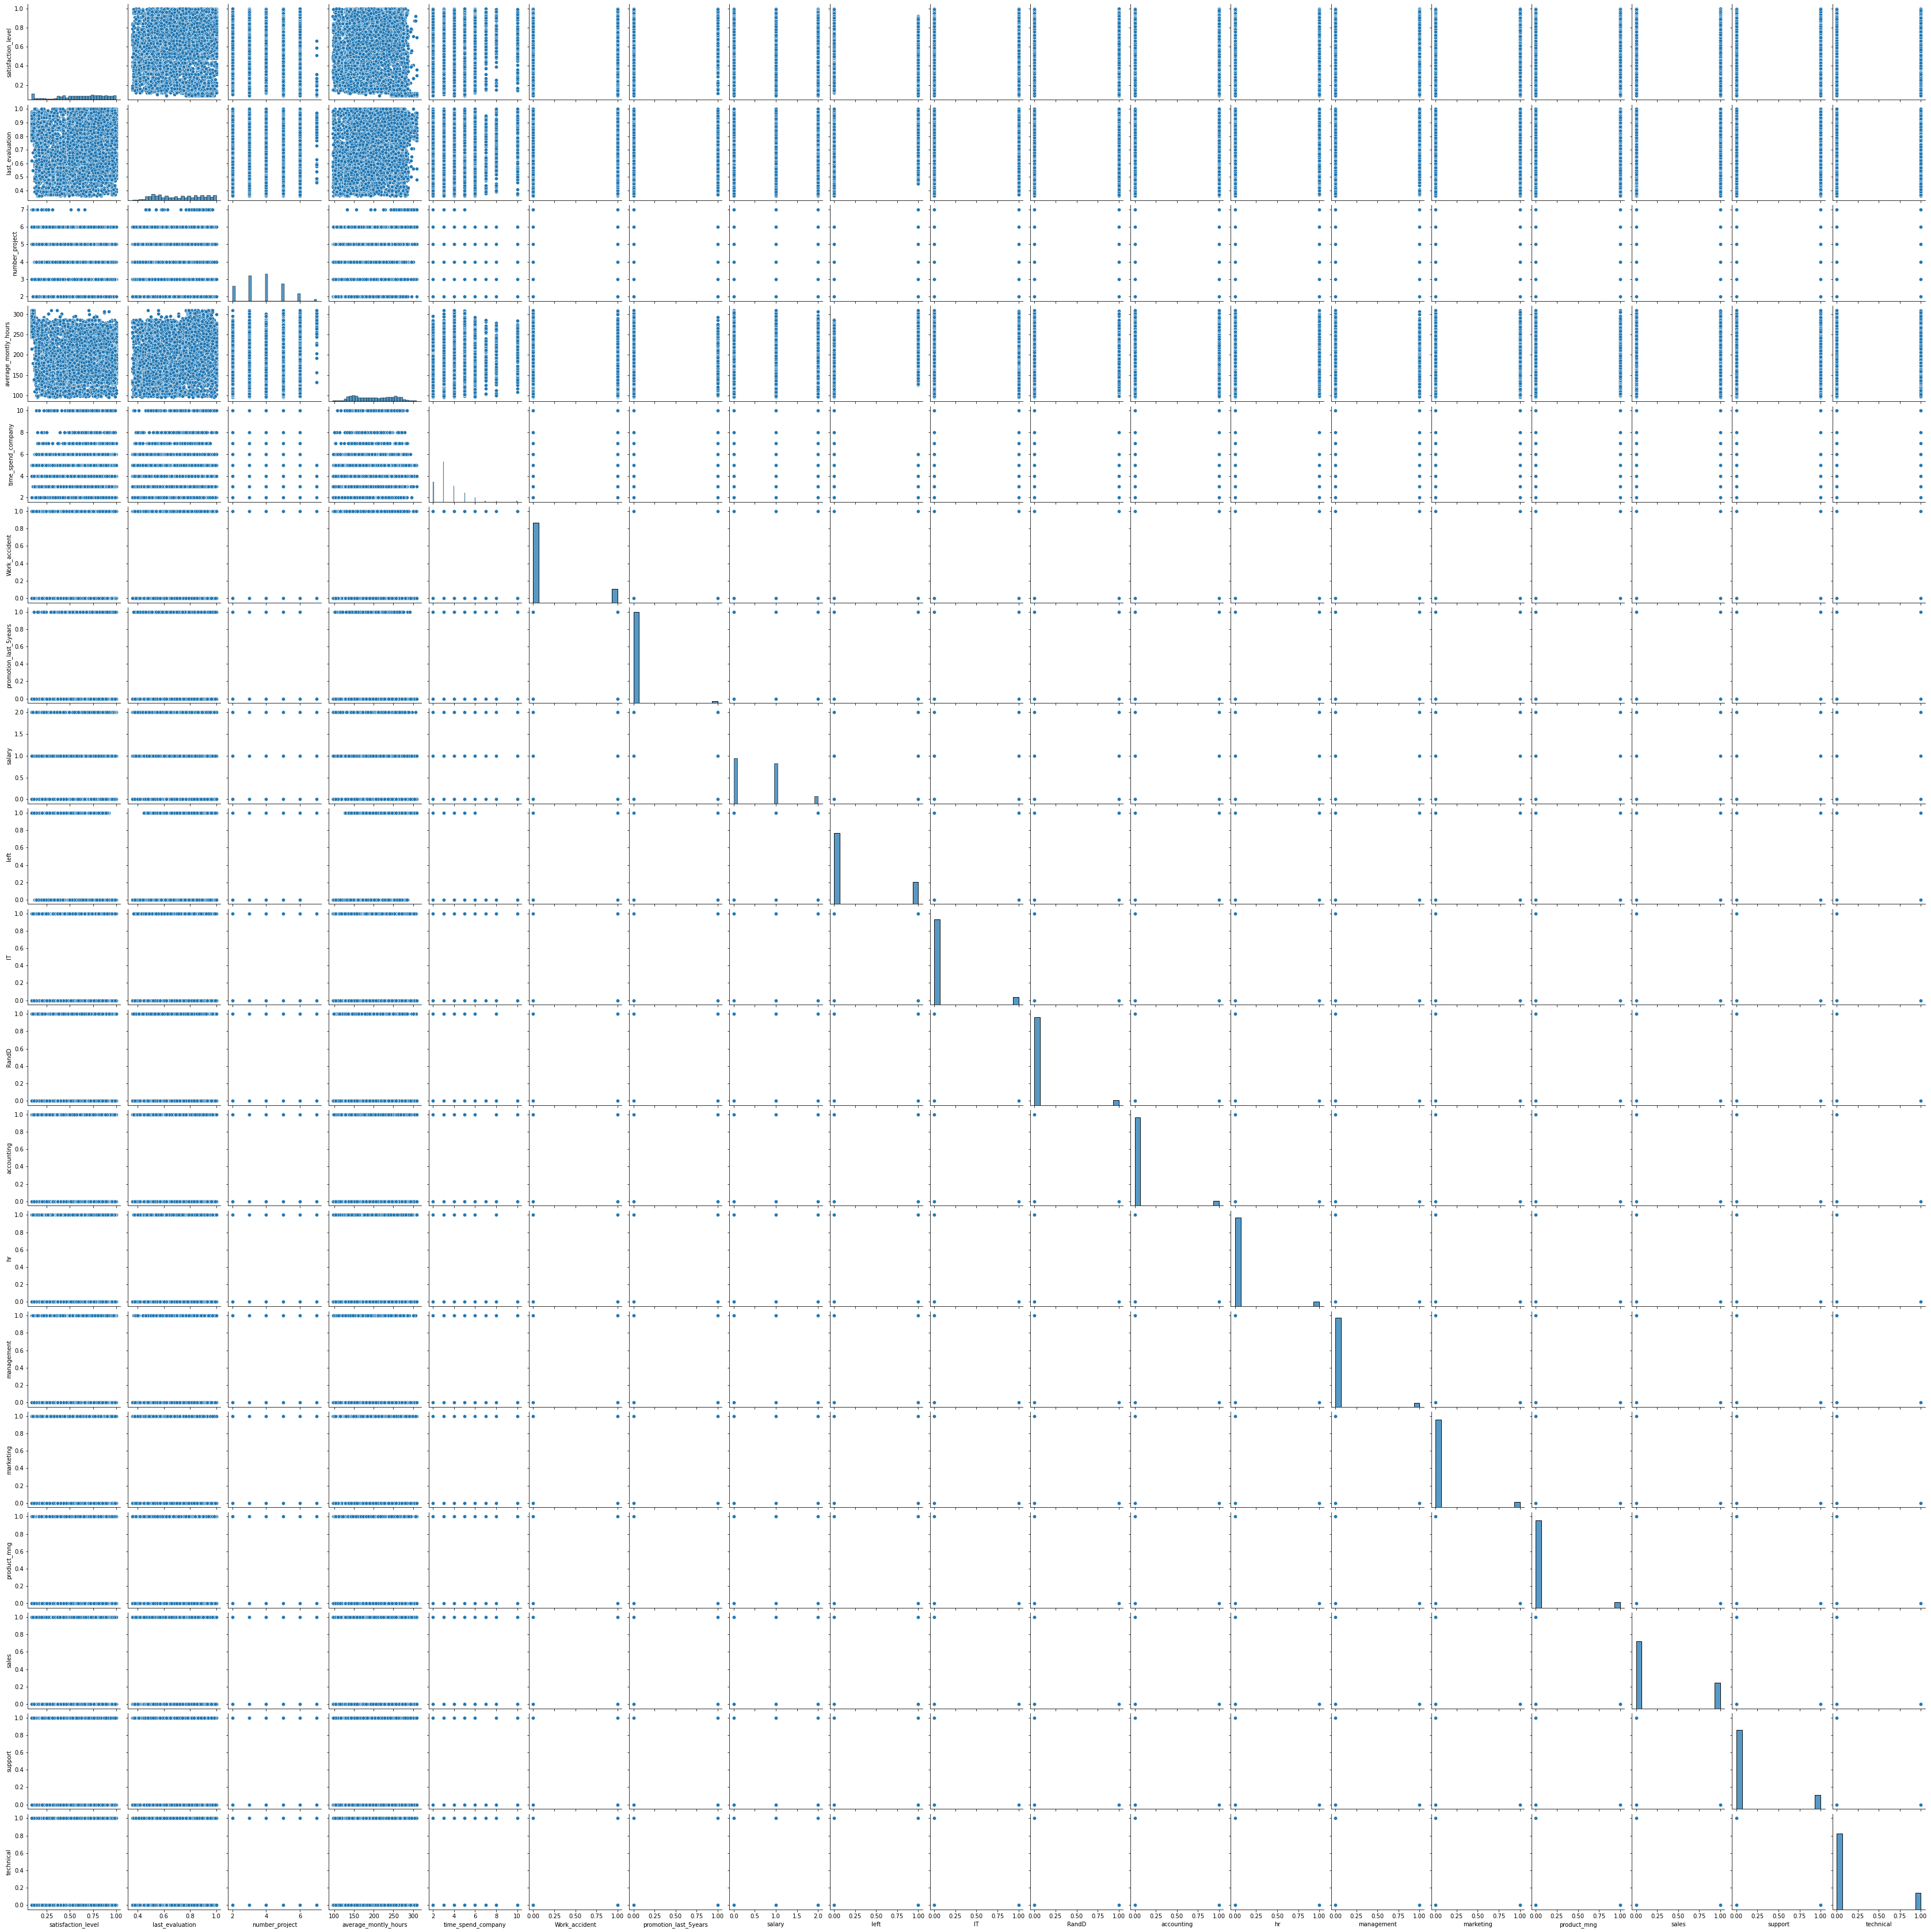

In [12]:
sns.pairplot(data)

Также построим графики всех признаков. Из них видно, что выбросов не наблюдается.

Также построим на них линии, обозначающие квантиль 0.995. Выше этих линий нет обособленных значений.

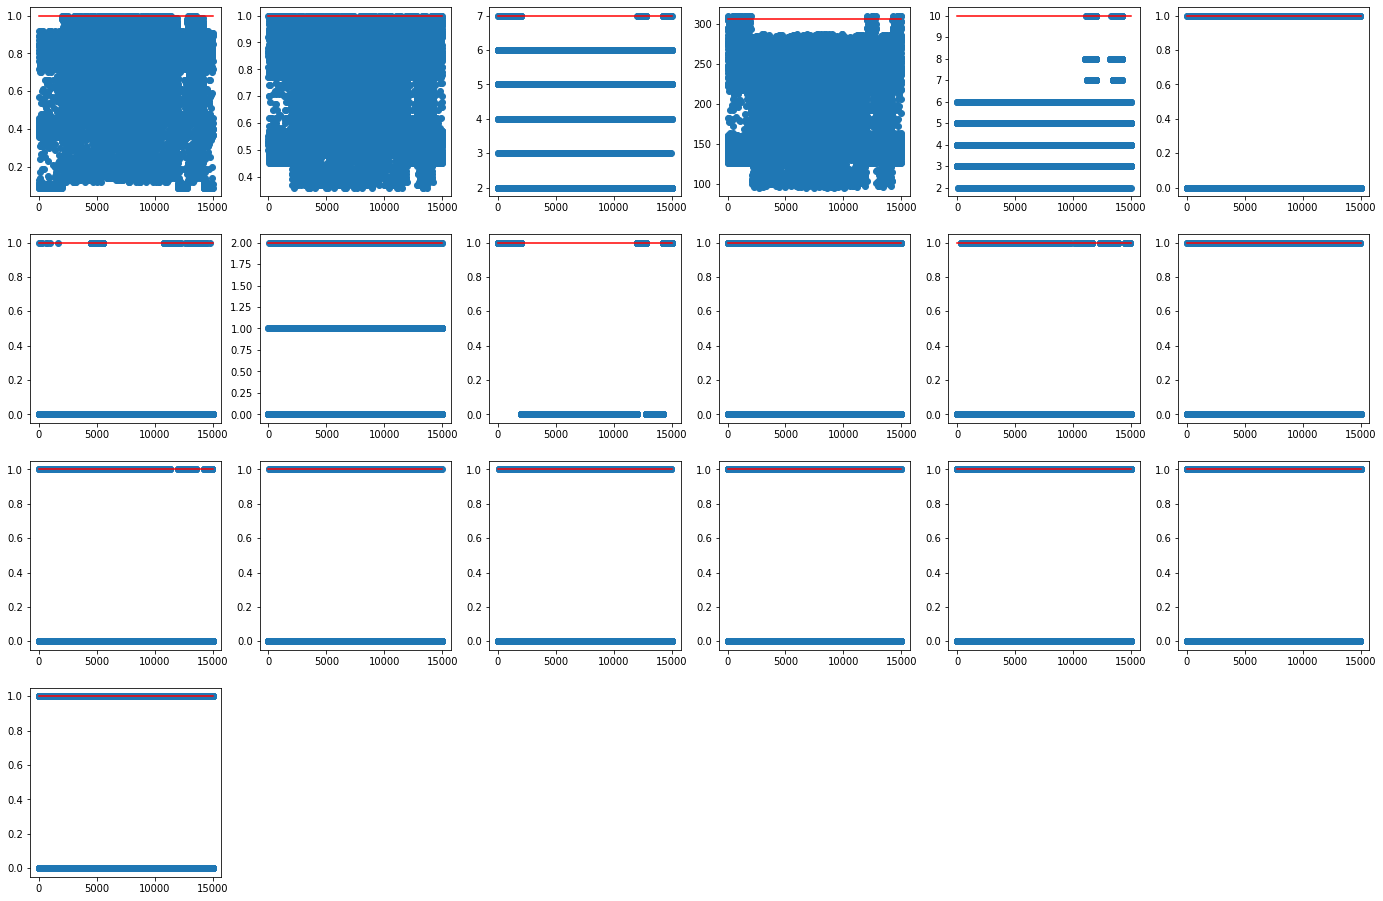

In [13]:
i = 1
plt.rcParams["figure.figsize"] = (24, 16)
for column in data.columns :
    plt.subplot(4, 6, i)
    plt.scatter([i for i in range(len(data[column]))], data[column])
    for quantile in data[column].quantile([.995]) :
        plt.plot([0, len(data[column])], [quantile, quantile], 'r-')
    i += 1

# Визуализация и описательная статистика

Выведем таблицу, содержащую информацию о признаках, например, среднее, отклонение, квантили.

In [14]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.594706,0.238083,0.081805,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.637183,0.425924,0.274077,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Построим диаграммы рассеивания всех признаков и целевого значения "left".

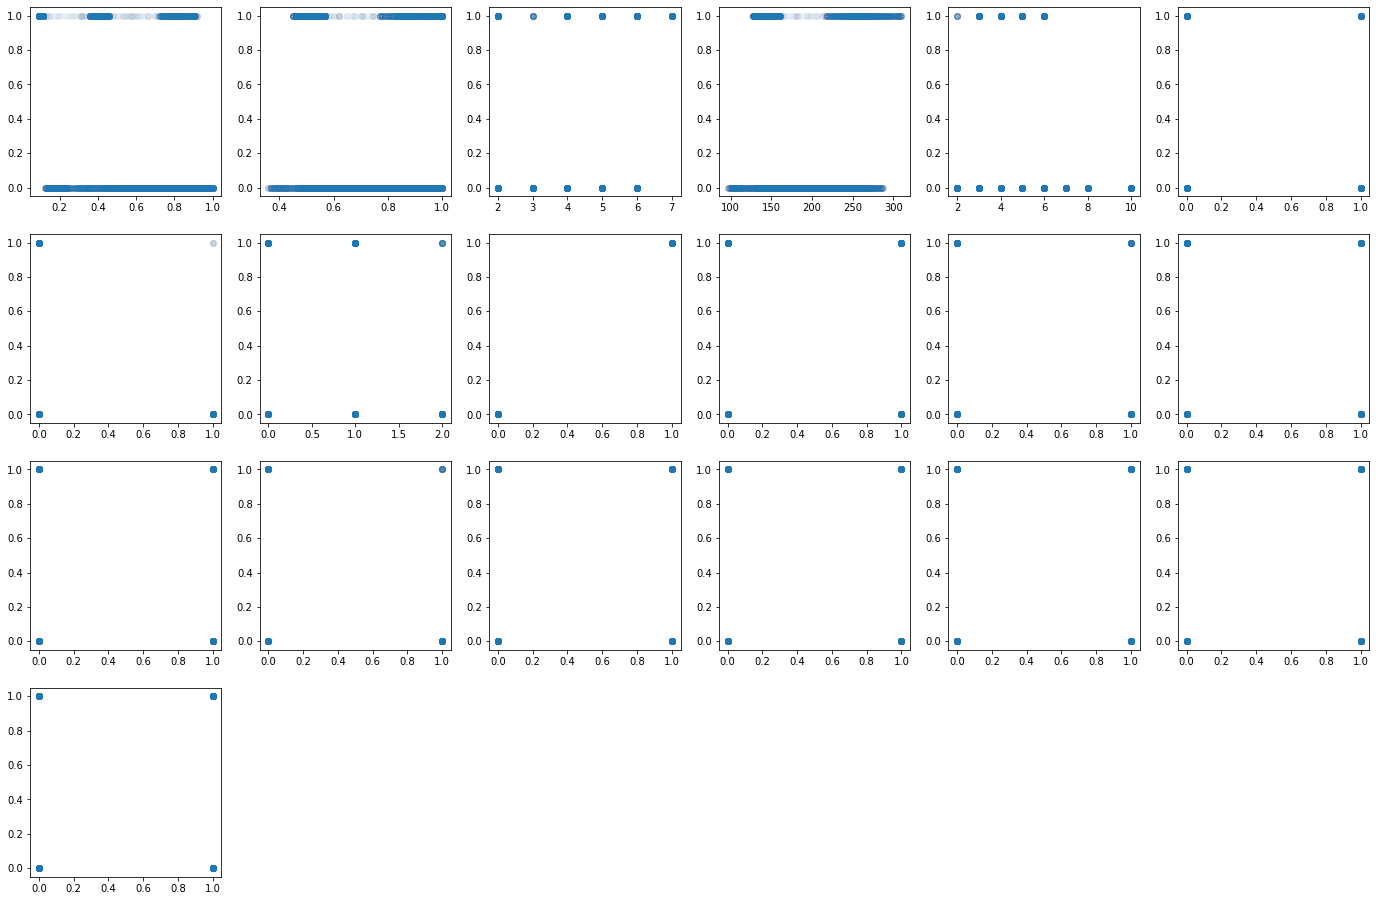

In [15]:
i = 1
plt.rcParams["figure.figsize"] = (24, 16)
for column in data.columns :
  plt.subplot(4, 6, i)
  plt.scatter(data[column], data['left'], alpha = 0.01)
  i += 1

Также посмотрим диаграммы рассеивания всех признаков, где цвет точки определяется значением целевого значения "left".

Так как значений очень много, а отрисовка точек занимает много времени, нарисуем только 100 значений, выбранные случайным образом.

No handles with labels found to put in legend.


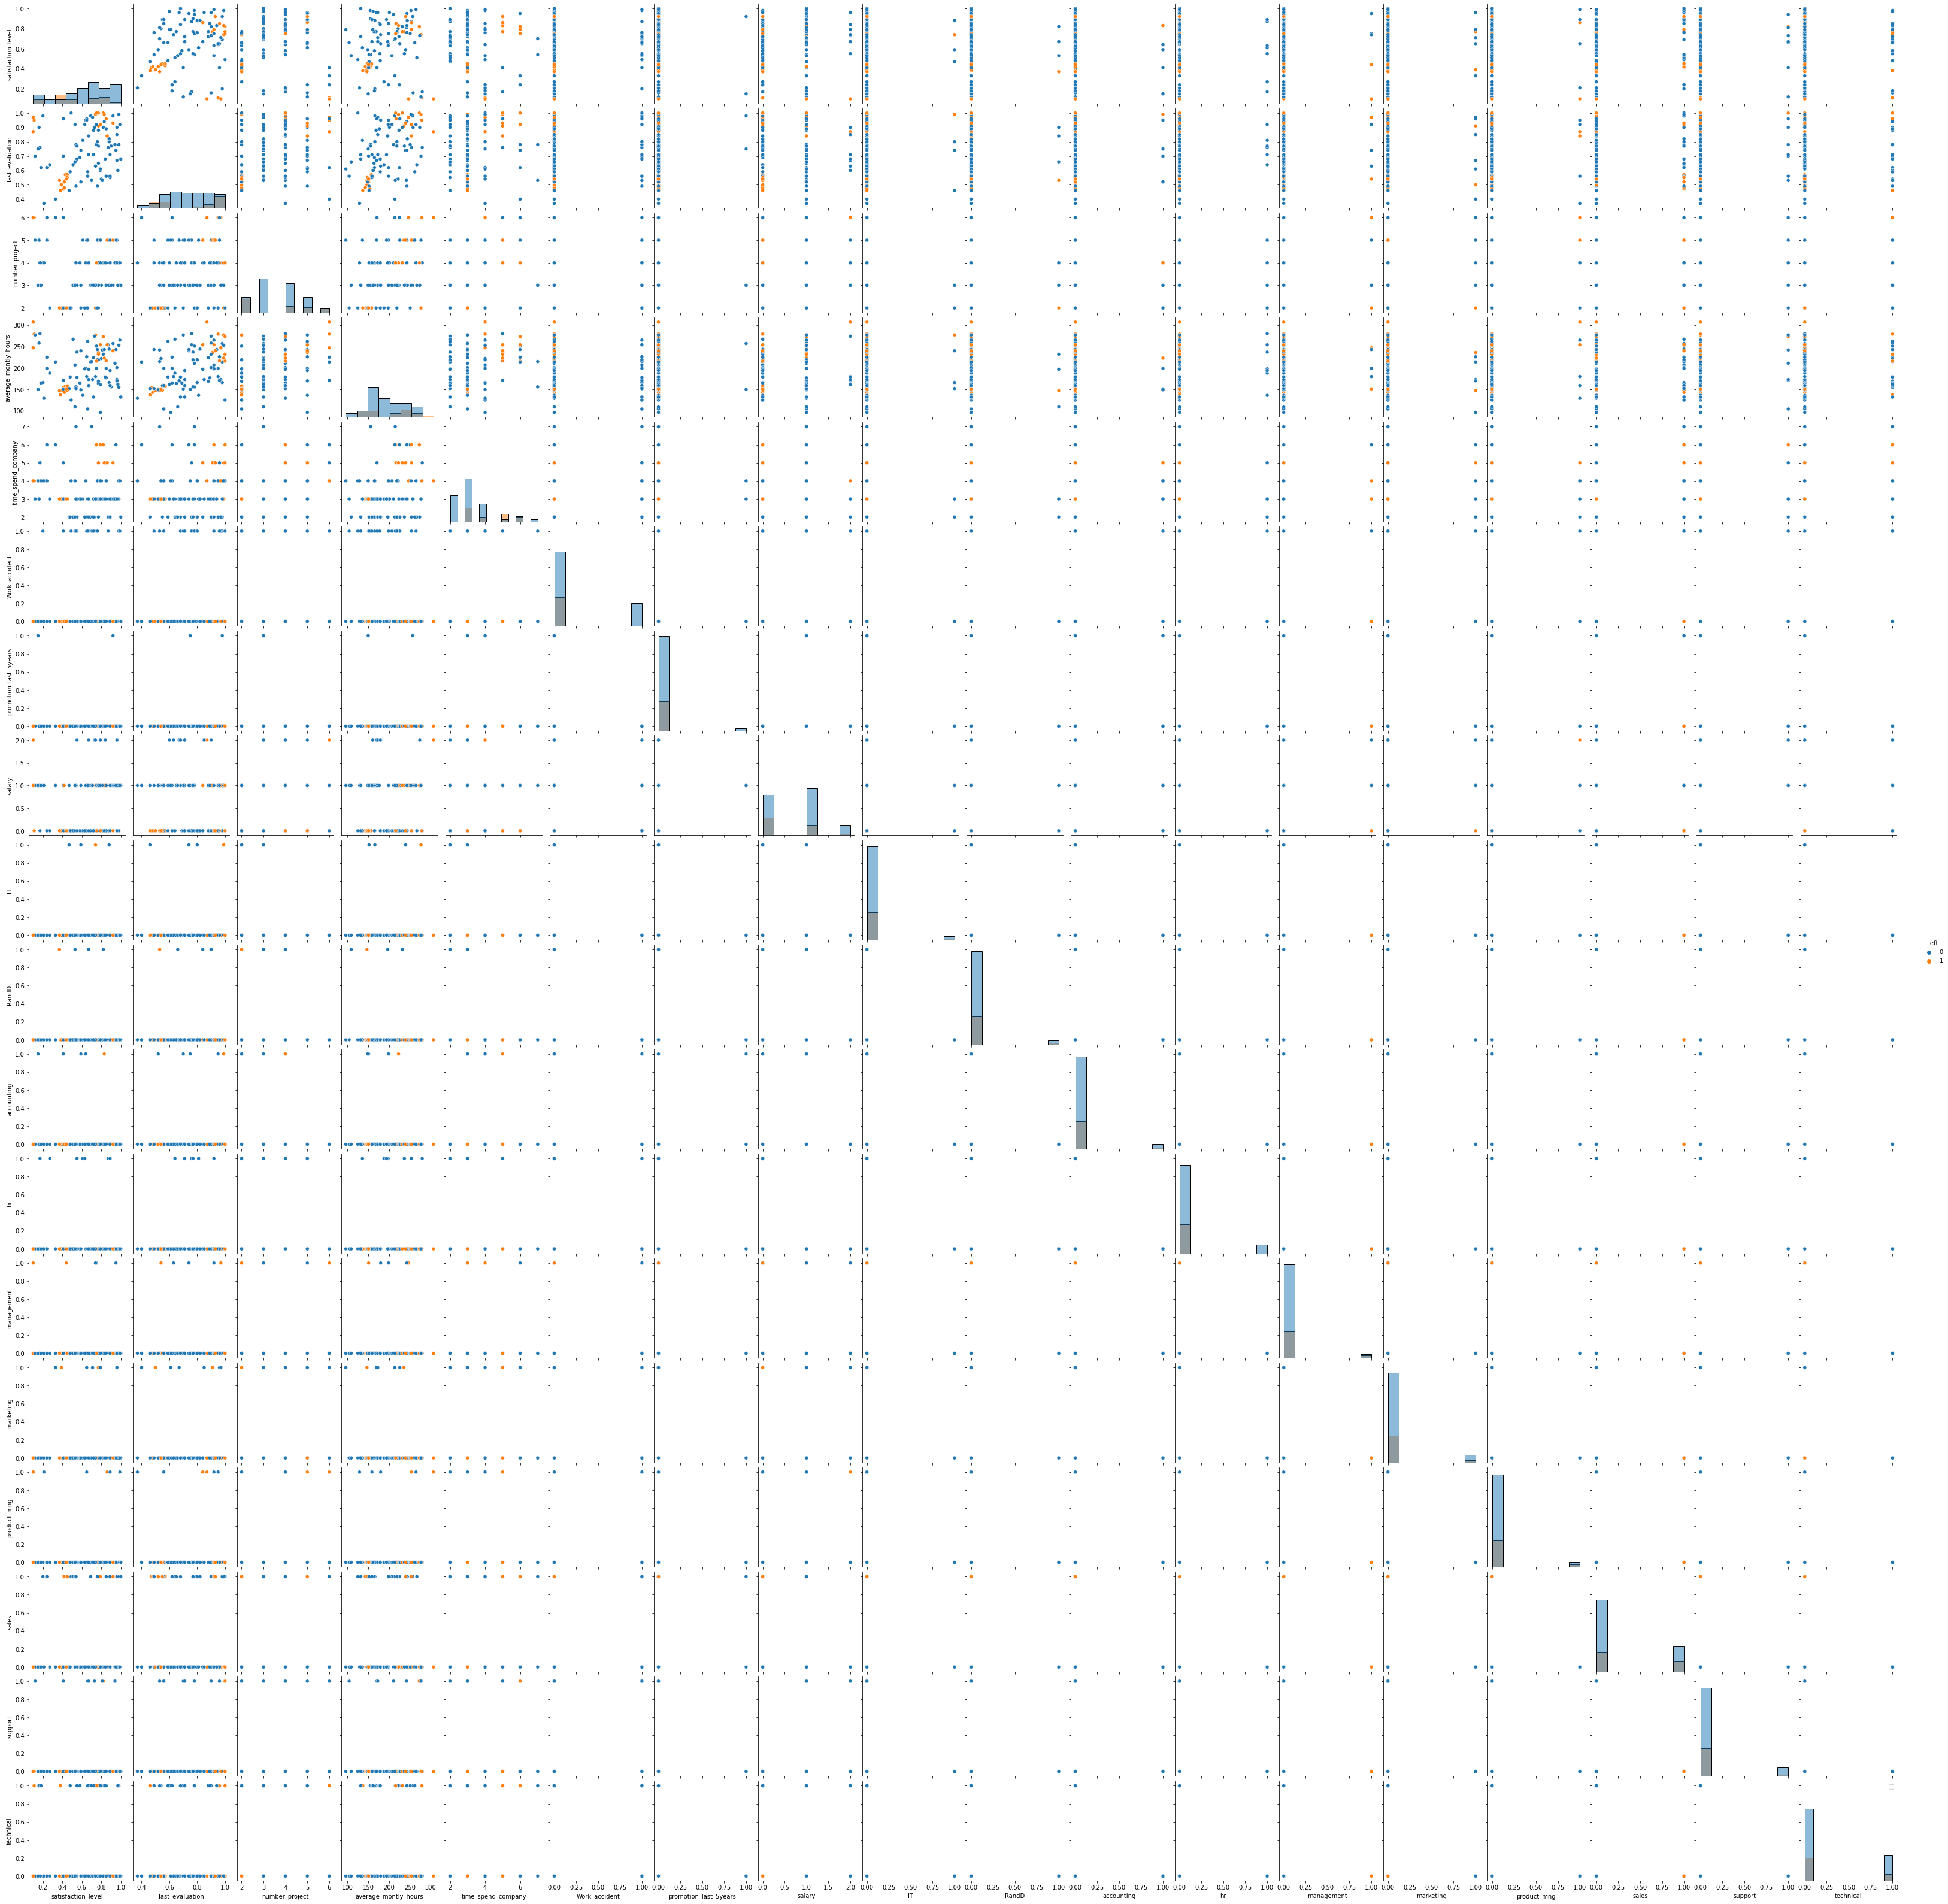

In [16]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=100, replace=False)
sns.pairplot(data.iloc[random_subset], hue='left', diag_kind='hist')
plt.legend()

Также нарисуем гистограммы, которые находились на главной диагонали придыдущего графика.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

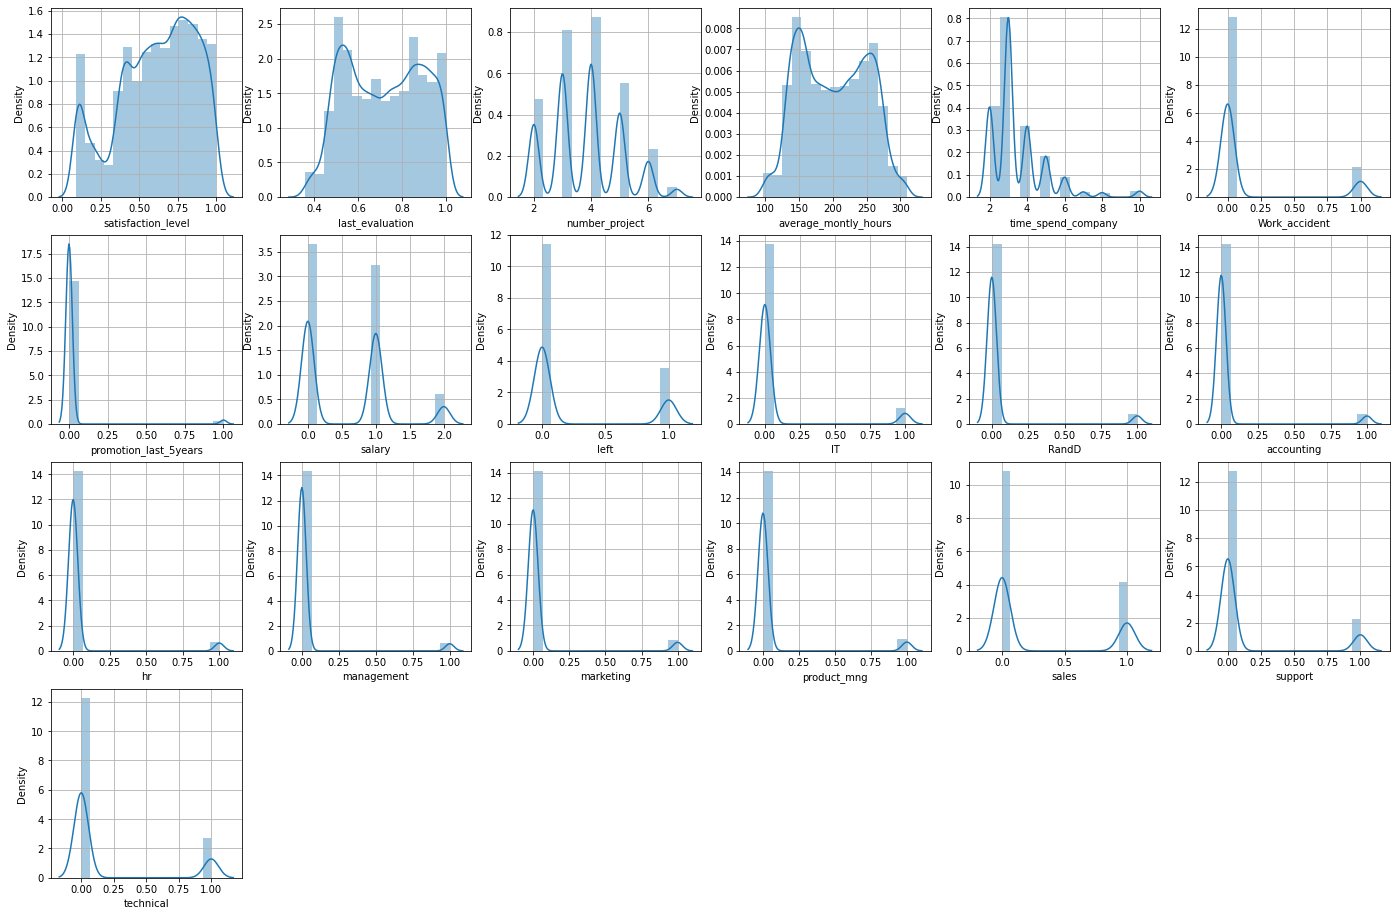

In [17]:
i = 1
plt.rcParams["figure.figsize"] = (24, 16)
for column in data.columns :
  plt.subplot(4, 6, i)
  sns.distplot(data[column], bins=15)
  plt.grid()
  i += 1

Еще одним важным типов визуализации является график "ящик с усами"

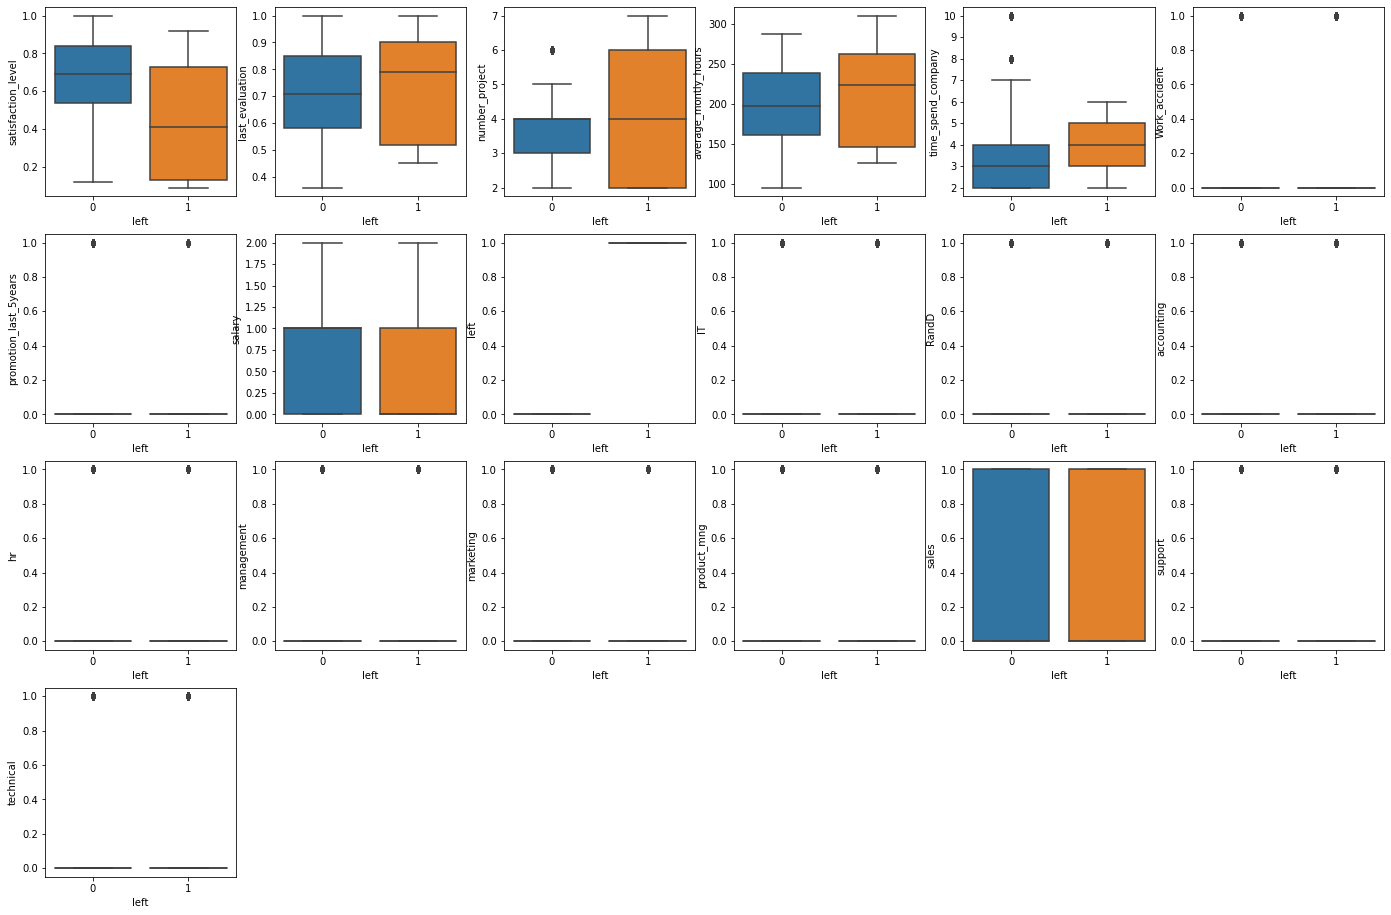

In [18]:
i = 1
plt.rcParams["figure.figsize"] = (24, 16)
for column in data.columns :
  plt.subplot(4, 6, i)
  sns.boxplot(x="left", y=column, data=data)
  i += 1

Также информацию можно получить, рассмотрев скрипичные графики.

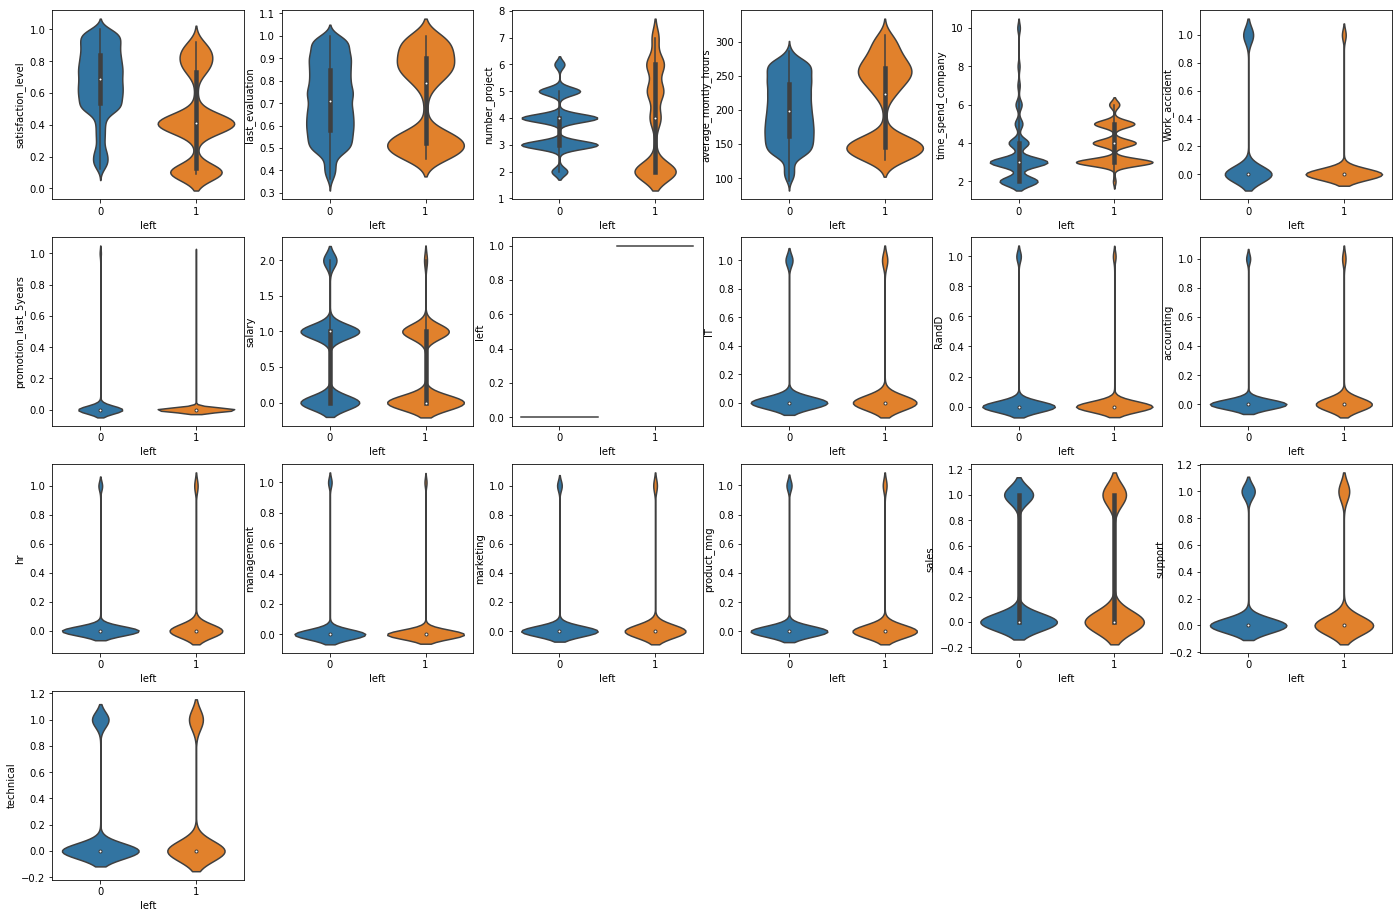

In [19]:
i = 1
plt.rcParams["figure.figsize"] = (24, 16)
for column in data.columns :
  plt.subplot(4, 6, i)
  sns.violinplot(x="left", y=column, data=data)
  i += 1

Напечатаем матрицу корреляции наших признаков.
Видно, что признаки редко превышают значение 0.3.

In [20]:
corr_mat = data.corr()
corr_mat

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,0.050022,-0.388375,0.006373,0.006615,-0.028649,-0.012841,0.007172,0.005715,0.006919,0.004007,0.009185,-0.009345
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,-0.013002,0.006567,0.001269,-0.005471,0.002193,-0.009645,0.009662,-0.000311,-0.001989,-0.023031,0.017104,0.013742
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,-0.001803,0.023787,0.003287,0.009703,0.004189,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,-0.002242,0.071287,0.006967,-0.001177,0.000524,-0.010783,0.000834,-0.008210,-0.005494,-0.001718,-0.002444,0.013638
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.048715,0.144822,-0.006053,-0.021116,0.003909,-0.022194,0.115436,0.012096,-0.003919,0.015150,-0.030111,-0.027991
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,0.009247,-0.154622,-0.009293,0.017167,-0.012836,-0.015649,0.011242,0.011367,0.001246,-0.004955,0.012079,-0.006070
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,0.098119,-0.061788,-0.038942,0.021268,-0.004852,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,0.098119,1.000000,-0.157898,-0.010959,0.002800,0.012759,0.004599,0.156665,0.011599,-0.007669,-0.035599,-0.029888,-0.018630
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,-0.157898,1.000000,-0.010925,-0.046596,0.015201,0.028249,-0.046035,-0.000859,-0.011029,0.009923,0.010700,0.020076
IT,0.006373,0.001269,0.003287,0.006967,-0.006053,-0.009293,-0.038942,-0.010959,-0.010925,1.000000,-0.070240,-0.069293,-0.067949,-0.062500,-0.073524,-0.075503,-0.184302,-0.124705,-0.140484


Визуализируем матрицу корреляции.

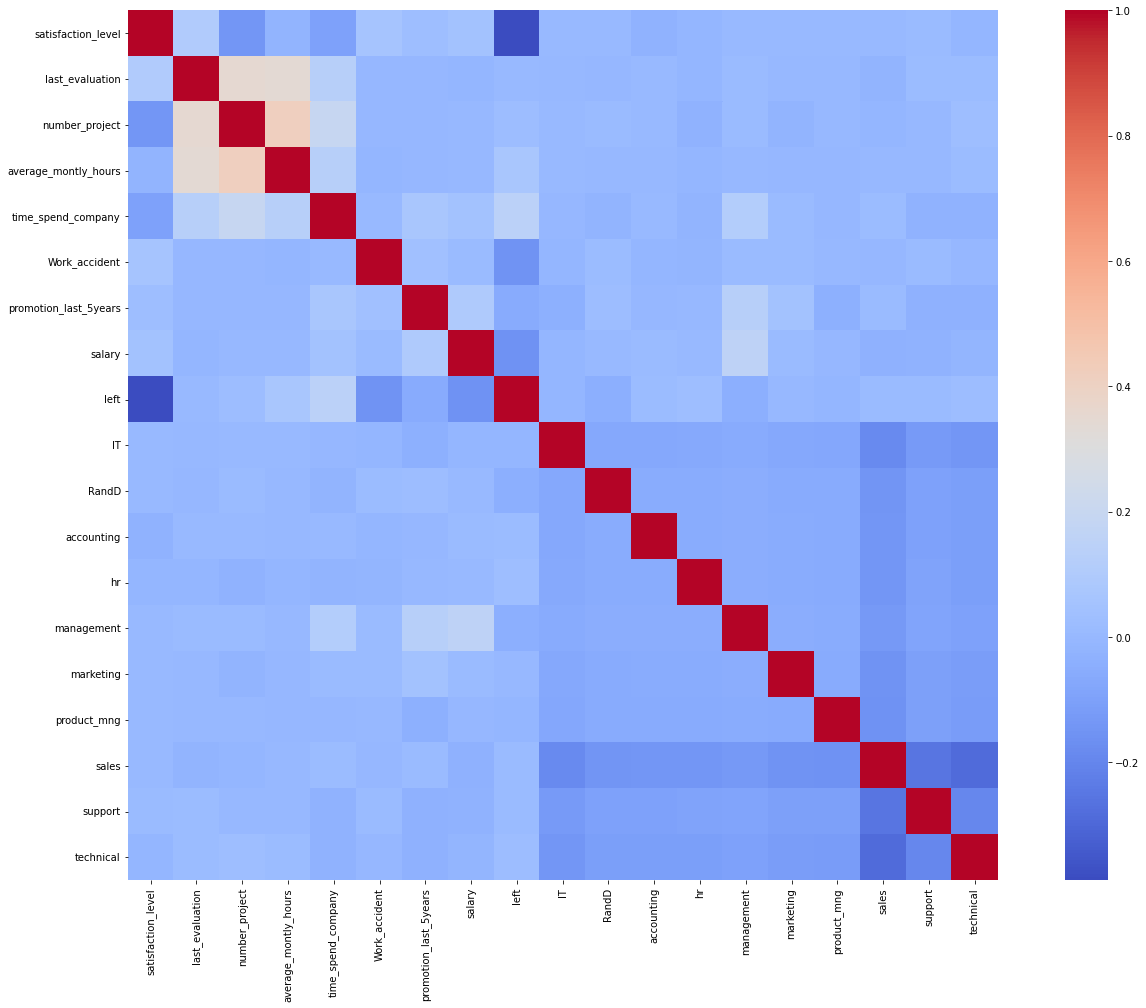

In [21]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')

Посмотрим, какие значения таблицы превышают 0.3

In [22]:
abs(corr_mat) > 0.3

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
satisfaction_level,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
last_evaluation,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
number_project,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
average_montly_hours,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
time_spend_company,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Work_accident,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
promotion_last_5years,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
salary,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
left,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
IT,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [23]:
corr_mat.where(np.triu(abs(corr_mat) > 0.3, k=1)).stack().sort_values(ascending=False)

number_project      average_montly_hours    0.417211
last_evaluation     number_project          0.349333
                    average_montly_hours    0.339742
satisfaction_level  left                   -0.388375
dtype: float64

# Нормализация

Посмотрим на данные и увидим, что средние значения признаков сильно отличаются. Это может негативно сказаться на обучение модели KNN.

Выполним стандартизацию признаков.

In [24]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.594706,0.238083,0.081805,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.637183,0.425924,0.274077,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
count,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04
mean,-3.100971e-15,5.800368e-14,7.193096e-16,-2.380403e-16,-1.572525e-15,-1.772930e-15,-9.784156e-15,7.151009e-15,1.760899e-14,-1.156197e-15,-7.352124e-15,-3.961910e-16,-5.118740e-15,1.272196e-14,-1.947128e-16,-3.069638e-15,2.292778e-15,2.289699e-15,-2.315983e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.102852e+00,-2.080409e+00,-1.462814e+00,-2.103400e+00,-1.026091e+00,-4.111516e-01,-1.474069e-01,-9.333368e-01,-5.589788e-01,-2.984759e-01,-2.353127e-01,-2.321401e-01,-2.276397e-01,-2.093835e-01,-2.463140e-01,-2.529446e-01,-6.174343e-01,-4.177776e-01,-4.706396e-01
25%,-6.951417e-01,-9.119738e-01,-6.515159e-01,-9.020333e-01,-3.412238e-01,-4.111516e-01,-1.474069e-01,-9.333368e-01,-5.589788e-01,-2.984759e-01,-2.353127e-01,-2.321401e-01,-2.276397e-01,-2.093835e-01,-2.463140e-01,-2.529446e-01,-6.174343e-01,-4.177776e-01,-4.706396e-01
50%,1.092644e-01,2.277432e-02,1.597823e-01,-2.103067e-02,-3.412238e-01,-4.111516e-01,-1.474069e-01,6.360711e-01,-5.589788e-01,-2.984759e-01,-2.353127e-01,-2.321401e-01,-2.276397e-01,-2.093835e-01,-2.463140e-01,-2.529446e-01,-6.174343e-01,-4.177776e-01,-4.706396e-01
75%,8.332298e-01,8.991007e-01,9.710806e-01,8.799947e-01,3.436438e-01,-4.111516e-01,-1.474069e-01,6.360711e-01,-5.589788e-01,-2.984759e-01,-2.353127e-01,-2.321401e-01,-2.276397e-01,-2.093835e-01,-2.463140e-01,-2.529446e-01,1.619497e+00,-4.177776e-01,-4.706396e-01
max,1.557195e+00,1.658583e+00,2.593677e+00,2.181476e+00,4.452849e+00,2.432031e+00,6.783490e+00,2.205479e+00,1.788857e+00,3.350131e+00,4.249382e+00,4.307456e+00,4.392614e+00,4.775606e+00,4.059588e+00,3.953171e+00,1.619497e+00,2.393459e+00,2.124626e+00


# Обучение KNN

Разобьем данные на обучающую и тестовую выборки

In [26]:
X = data_stand.drop(['left'], axis=1)
y = data['left']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(11249, 3750)

Создадим и обучим модель KNN с 3 соседями.

In [28]:
from sklearn.neighbors import KNeighborsClassifier as KNN

model = KNN(3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

Вычислим ошибку, используя разные метрики.

In [30]:

from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(0.023468752778024713, 0.0512, 0.8704843313540824, 0.7186555957643601)

In [31]:
model.score(X_train, y_train)

0.9765312472219753

In [32]:
model.score(X_test, y_test)

0.9488

Повторим операции для KNN с 5 и 7 соседями и сравним результаты.

In [33]:
model = KNN(5)
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test, model.score(X_train, y_train), model.score(X_test, y_test)

(0.03964796870832963,
 0.058133333333333335,
 0.7811970143330331,
 0.6805568743574504,
 0.9603520312916703,
 0.9418666666666666)

In [34]:
model = KNN(7)
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test, model.score(X_train, y_train), model.score(X_test, y_test)

(0.04658191839274602,
 0.06,
 0.7429310213240119,
 0.6702995262863594,
 0.9534180816072539,
 0.94)

# Выводы

В результаты проделанной работы мы скачали данные, проверили наличие выбросов, нормировали значения, провели анализ данных.

Обучили KNN с разым количеством соседей и увидели, что увеличение числа соседей негативно сказывается на качетсве работы классификатора.

#Обучение нейронной сети

Подключаем необходимые функции

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

Обучаем модели с разными значениями параметров. Создаются массивы со значениями параметров alpha и N. Затем создаются и обучаются модели со всеми значениями параметров из этих массивов. Также в процессе вычисляются точность и ошибка на тестовой и обучающей выборке.

In [ ]:
train_err = []
test_err = []
train_acc = []
test_acc = []
alpha_array = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]
N_array = [1, 3, 5, 10, 20, 50, 70, 100, 150, 200, 250, 300]
Train_accuracy = pd.DataFrame(0., index = alpha_array, columns = N_array)
Test_accuracy = pd.DataFrame(0., index = alpha_array, columns = N_array)
Train_error = pd.DataFrame(0., index = alpha_array, columns = N_array)
Test_error = pd.DataFrame(0., index = alpha_array, columns = N_array)

for n in N_array :
  for alpha in alpha_array :

    print(n, alpha)

    mlp_model = MLPClassifier(hidden_layer_sizes = (n,2),
                              solver = 'lbfgs', 
                              activation = 'logistic',
                              random_state = 42,
                              alpha = alpha)

    mlp_model.fit(X_train, y_train)

    y_train_predict = mlp_model.predict(X_train)
    y_test_predict  = mlp_model.predict(X_test)

    Train_error[n][alpha] = np.mean(y_train != y_train_predict)
    Test_error[n][alpha] = np.mean(y_test != y_test_predict)
    Train_accuracy[n][alpha] = accuracy_score(y_train, y_train_predict)
    Test_accuracy[n][alpha] = accuracy_score(y_test, y_test_predict)

Затем строятся графики ошибок и точностей. На каждом графике выводятся значения в зависимости от параметров. На пересечении нужных значений параметров находится ячейка, закрашенная своим цветом. Чем лучше значение, тем светлее цвет. В ячейке с лучшим значением написано само значение ошибки/точности.

/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


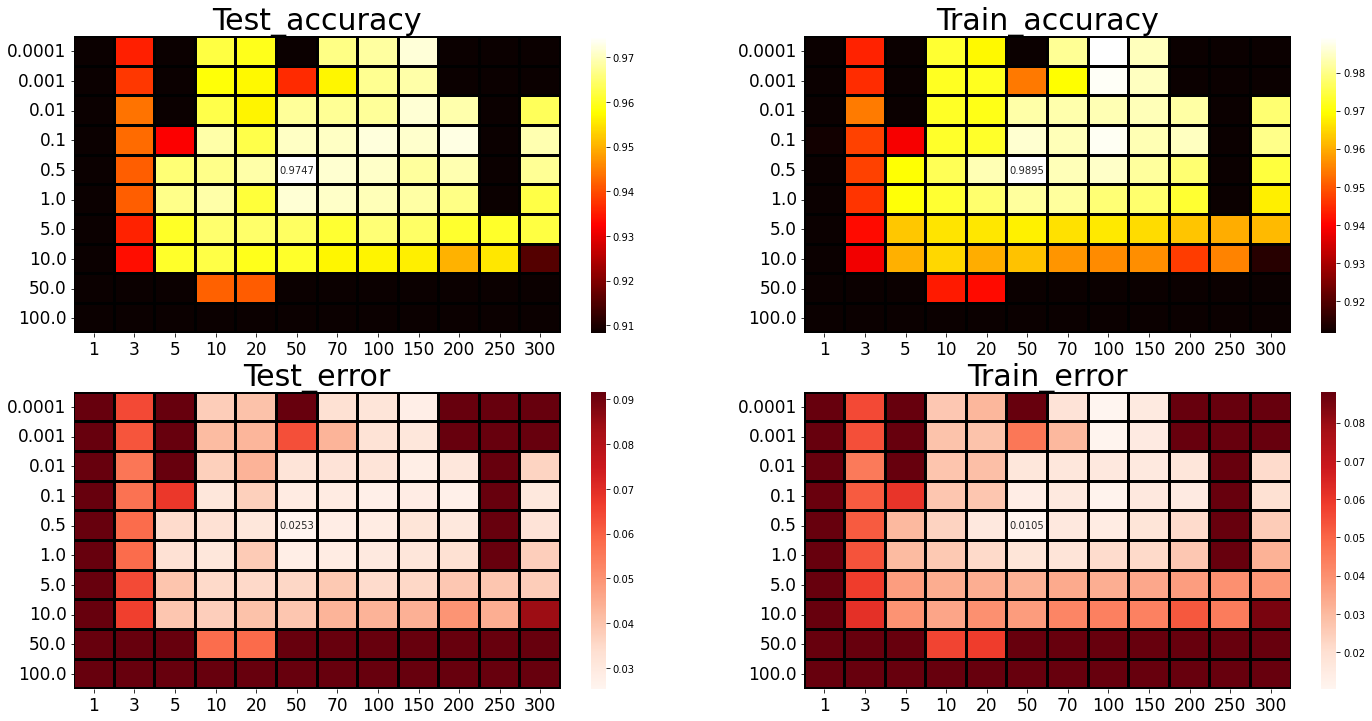

In [56]:
M1 = Test_accuracy.values.max()
M2 = Train_accuracy.values.max()
M3 = Test_error.values.min()
M4 = Train_error.values.min()

Mask = ((Test_accuracy == M1) + (Train_accuracy == M2) + (Test_error == M3) + (Train_error == M4))

plt.subplot(2, 2, 1)
sns.heatmap(Test_accuracy, annot = round(Test_accuracy[Mask], 4).fillna(''),
            cmap = 'hot', fmt='', linewidths=2, linecolor='black',
            vmin = Test_accuracy.quantile(0.9).min())
plt.title('Test_accuracy', fontsize=30)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)


plt.subplot(2, 2, 2)
sns.heatmap(Train_accuracy, annot = round(Train_accuracy[Mask], 4).fillna(''),
            cmap = 'hot', fmt='', linewidths=2, linecolor='black',
            vmin = Train_accuracy.quantile(0.9).min())
plt.title('Train_accuracy', fontsize=30)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)


plt.subplot(2, 2, 3)
sns.heatmap(Test_error, annot = round(Test_error[Mask], 4).fillna(''),
            cmap = 'Reds', fmt='', linewidths=2, linecolor='black',
            vmax = Test_error.quantile(0.05).max())
plt.title('Test_error', fontsize=30)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)


plt.subplot(2, 2, 4)
sns.heatmap(Train_error, annot = round(Train_error[Mask], 4).fillna(''),
            cmap = 'Reds', fmt='', linewidths=2, linecolor='black',
            vmax = Train_error.quantile(0.05).max())
plt.title('Train_error', fontsize=30)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.show()

Из предыдущих графиков видно, что лучшее сочетание параметров - alpha = 0.5, N = 50. Еще раз обучим модель при таких параметрах и посмотрим на результаты.

In [38]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50,2),
                              solver = 'lbfgs', 
                              activation = 'logistic',
                              random_state = 42,
                              alpha = 0.5)

mlp_model.fit(X_train, y_train)

y_train_predict = mlp_model.predict(X_train)
y_test_predict  = mlp_model.predict(X_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [39]:
print(f'Train error     =  {np.mean(y_train != y_train_predict)}')
print(f'Test error      =  {np.mean(y_test != y_test_predict)}')
print(f'Train accuracy  =  {accuracy_score(y_train, y_train_predict)}')
print(f'Test accuracy   =  {accuracy_score(y_test, y_test_predict)}')

Train error     =  0.01048982131745044
Test error      =  0.025333333333333333
Train accuracy  =  0.9895101786825495
Test accuracy   =  0.9746666666666667


Из результатов видно, что алгоритм одинаково хорошо справляется и с данными из обучающей выборки, и с данными из тестовой. Это говорит об отсутствии переобучения и недообучения.

# Выводы

В результате выполненной работы была обучена модель нейронной сети с двумя скрытыми слоями, разным количеством нейронов на слое и разными значениями праметра alpha.

Найдено лучшее сочетание параметров из рассматриваемого множества.

При таком наборе параметров нейронная сеть показала немного лучший результат относительно метода KNN.

KNN : Train = 0.976 Test = 0.949

MLP : Train = 0.989 Test = 0.975
